# ZOMATO API - II Solutions

##### Q1.)

The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

##### 1.1.) Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

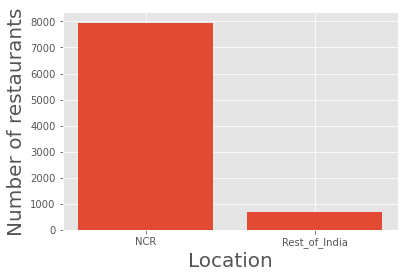

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
data = pd.read_csv('zomato.csv',encoding='latin-1')

# Removing all countries other than India(Country Code - 1)
data = data[data["Country Code"] == 1]

# Grouping all cities as Delhi_NCR or Rest_of_India
data_copy = data.copy()

NCR_cities = ["New Delhi" , "Ghaziabad" , "Noida" , "Gurgaon" , "Faridabad"]

# A dictinary to keep count and later plot the graph.
count_dict = {"NCR":0 , "Rest_of_India" : 0}

def makeDict(cityname):
    if cityname in NCR_cities:
        count_dict["NCR"]+=1
    else:
        count_dict["Rest_of_India"]+=1        

# Making the dictionary
data_copy["City"].apply(makeDict)

keys = []
values = []
for key,value in count_dict.items() :
    keys.append(key)
    values.append(value)

# Plotting the bar graph
plt.style.use("ggplot")
plt.bar(keys , values)
plt.xticks()
plt.xlabel("Location" , size = 20)
plt.ylabel("Number of restaurants",size = 20)
plt.show()

##### 1.2.) Find the cuisines which are not present in restaurant of Delhi NCR but present in restof India. Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCRor just it due to incomplete dataset.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
data = pd.read_csv('zomato.csv',encoding='latin-1')

# Removing all countries other than India(Country Code - 1)
data = data[data["Country Code"] == 1]

grouped_data = data.copy()

NCR_cities = ["New Delhi" , "Ghaziabad" , "Noida" , "Gurgaon" , "Faridabad"]

def changeName(cityname):
    if cityname in NCR_cities:
        return "NCR"
    else:
        return "Rest_Of_India"       


grouped_data["City"] = grouped_data["City"].apply(changeName)

NCR_cuisines = set()
Rest_of_India_cuisines = set()

grouped_data["City_and_Cuisine"] = grouped_data["City"]+"///"+grouped_data["Cuisines"]

def findCuisine(CityCuisine):
    city = CityCuisine.split("///")[0]
    cuisine = CityCuisine.split("///")[1].split(", ")
    
    if city == "NCR":
        for i in cuisine:
            NCR_cuisines.add(i)
    else:
        for i in cuisine:
            Rest_of_India_cuisines.add(i)
    
grouped_data["City_and_Cuisine"].apply(findCuisine)

cuisines_not_in_NCR = []

for i in Rest_of_India_cuisines:
    if i not in NCR_cuisines:
        cuisines_not_in_NCR.append(i)
        
for i in cuisines_not_in_NCR:
    print(i)
        

    

German
BBQ
Malwani
Cajun


##### Checking if these cuisines are actially not served in Delhi-NCR or its due

##### to incomlete dataset , using Zomato API

In [21]:
import requests

r = requests.get('https://developers.zomato.com/api/v2.1/cuisines' ,headers = {'user-key' : '7f51a93a442e47390afafde1af103eaf'},
                params = {"city_id" : 1})

ans = r.json()

cuisines = ans["cuisines"]


cuisines_in_delhi = []

for i in cuisines:
    cuisines_in_delhi.append(i["cuisine"]["cuisine_name"])

cuisines_not_in_NCR = ['BBQ','Cajun','Malwani','German']    
    
for i in cuisines_not_in_NCR:
    if i in cuisines_in_delhi:
        print(i+" is actually served in NCR.")

BBQ is actually served in NCR.
Malwani is actually served in NCR.


###### We observe that the dataset is probably incomplete.

##### 1.3.)

Top 10 cuisines in Delhi-NCR and Rest of India are:- 

North Indian
Chinese
Fast Food
Mughlai
Bakery
Continental
Italian
South Indian
Cafe
Desserts


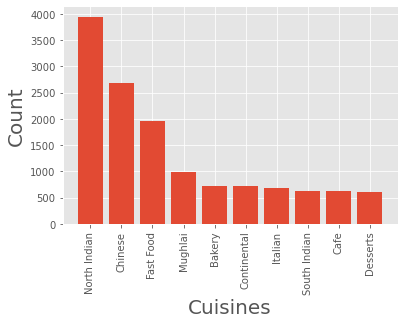

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
data = pd.read_csv('zomato.csv',encoding='latin-1')

# Removing all countries other than India(Country Code - 1)
data = data[data["Country Code"] == 1]

data_copy = data.copy()

cuisines_count = {}

def cuisinecount(cuisine):
    l = cuisine.split(", ")
    for i in l:
        if i in cuisines_count.keys():            
            cuisines_count[i]+=1
        else:
            cuisines_count[i] = 1

data_copy["Cuisines"].apply(cuisinecount)


cuisines_count = {key: value for key, value in sorted(cuisines_count.items(), key=lambda item: item[1],reverse = True)}

cuisine = list(cuisines_count.keys())[:10]
count = list(cuisines_count.values())[:10]

print("Top 10 cuisines in Delhi-NCR and Rest of India are:- \n")
for i in list(cuisines_count.keys())[:10]:
    print(i)

plt.bar(cuisine,count)
plt.xticks(rotation=90)
plt.xlabel("Cuisines",size = 20)
plt.ylabel("Count", size = 20)
plt.show()

##### 1.4.)

86 cuisines are served in Delhi-NCR .

70 cuisines are served in Rest of India .

Top 10 Cuisines served in Delhi along with number of restaurants :- 

North Indian  :  3597 
Chinese  :  2448 
Fast Food  :  1866 
Mughlai  :  933 
Bakery  :  697 
South Indian  :  569 
Continental  :  547 
Desserts  :  542 
Street Food  :  538 
Italian  :  535 

Top 10 Cuisines served in Rest of India along with number of restaurants :- 

North Indian  :  349 
Chinese  :  242 
Continental  :  177 
Italian  :  147 
Cafe  :  136 
Fast Food  :  97 
South Indian  :  62 
Mughlai  :  59 
Desserts  :  55 
Mexican  :  50 



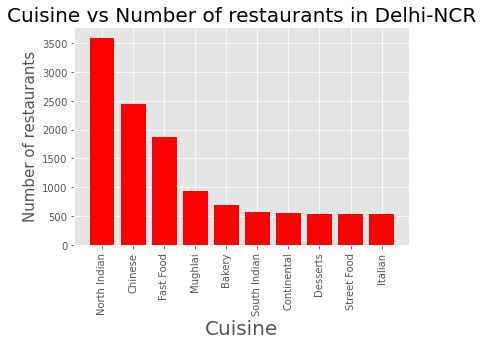

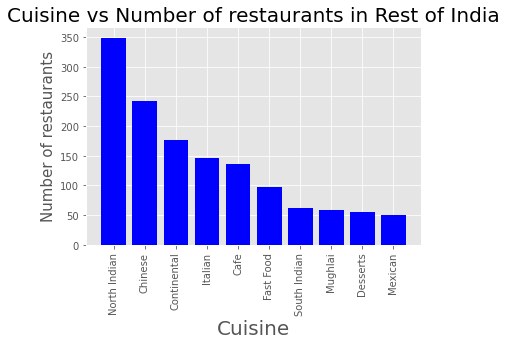

Cuisines served in Delhi-NCR but not in Rest of India are:- 

Raw Meats
Sushi
Kashmiri
Afghani
Nepalese
Turkish
Naga
Bihari
Moroccan
Assamese
Iranian
South American
Drinks Only
Pakistani
Oriya
Belgian
Persian
Cuisine Varies
Deli
Sri Lankan

Cuisines served in Rest of India but not in Delhi-NCR are:- 

German
Malwani
BBQ
Cajun


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('zomato.csv' , encoding = 'latin-1')

data = data[data["Country Code"] == 1]

data_copy = data.copy()

NCR_cities = ["New Delhi" , "Ghaziabad" , "Noida" , "Gurgaon" , "Faridabad"]

def groupCity(cityname):
    if cityname in NCR_cities:
        return "NCR"
    else:
        return "Rest_Of_India"       


data_copy["City"] = data_copy["City"].apply(groupCity)

NCR_cuisines = {}
Rest_of_India_cuisines = {}

data_copy["City_and_Cuisine"] = data_copy["City"]+"///"+data_copy["Cuisines"]

def findCuisine(CityCuisine):
    city = CityCuisine.split("///")[0]
    cuisine = CityCuisine.split("///")[1].split(", ")
    
    if city == "NCR":
        for i in cuisine:
            if i in NCR_cuisines.keys():
                NCR_cuisines[i] += 1
            else:
                NCR_cuisines[i] = 1
    else:
        for i in cuisine:
            if i in Rest_of_India_cuisines.keys():
                Rest_of_India_cuisines[i] += 1
            else:
                Rest_of_India_cuisines[i] = 1
    
data_copy["City_and_Cuisine"].apply(findCuisine)

############################
# Sorting the two dictionaries
NCR_cuisines = {key: value for key, value in sorted(NCR_cuisines.items(), key=lambda item: item[1],reverse = True)}
Rest_of_India_cuisines = {key: value for key, value in sorted(Rest_of_India_cuisines.items(), key=lambda item: item[1],reverse = True)}



############################
print(str(len(NCR_cuisines))+" cuisines are served in Delhi-NCR .")
print()
print(str(len(Rest_of_India_cuisines))+" cuisines are served in Rest of India .")
print()
############################
# List of ncr cuisines and the no of restaurants serving those cuisines.
top10_NCR_cuisines = list(NCR_cuisines.keys())[:10]
top10_NCR_cuisines_count = list(NCR_cuisines.values())[:10]

print("Top 10 Cuisines served in Delhi along with number of restaurants :- \n")
for i in top10_NCR_cuisines:
    print(i," : ",NCR_cuisines[i],end=" ")
    print()
print()
############################
#List of rest of india cuisines and no of restaurants serving those cuisines.
top10_RestOfIndia_cuisines = list(Rest_of_India_cuisines.keys())[:10]
top10_RestOfIndia_cuisines_count = list(Rest_of_India_cuisines.values())[:10]

print("Top 10 Cuisines served in Rest of India along with number of restaurants :- \n")
for i in top10_RestOfIndia_cuisines:
    print(i," : ",Rest_of_India_cuisines[i],end = " ")
    print()
print()
#############################
# Plotting graph for NCR
plt.style.use('ggplot')
plt.title("Cuisine vs Number of restaurants in Delhi-NCR" , size = 20)
plt.bar(top10_NCR_cuisines , top10_NCR_cuisines_count , color = 'red')
plt.xticks(rotation = 90)
plt.xlabel('Cuisine' ,size = 20)
plt.ylabel('Number of restaurants',size = 15)
plt.show()
#############################
# Plotting graph for Rest of India
plt.style.use('ggplot')
plt.title("Cuisine vs Number of restaurants in Rest of India" , size = 20)
plt.bar(top10_RestOfIndia_cuisines , top10_RestOfIndia_cuisines_count , color = 'b')
plt.xticks(rotation = 90)
plt.xlabel('Cuisine' ,size = 20)
plt.ylabel('Number of restaurants',size = 15)
plt.show()

#############################
print("Cuisines served in Delhi-NCR but not in Rest of India are:- \n")
for i in NCR_cuisines.keys() :
    if i not in Rest_of_India_cuisines.keys() :
        print(i)
        
#############################
print("\nCuisines served in Rest of India but not in Delhi-NCR are:- \n")
for i in Rest_of_India_cuisines.keys() :
    if i not in NCR_cuisines.keys() :
        print(i)
        